# Εργαστηριακή Άσκηση Υπολογιστικής Νοημοσύνης
## Μέρος Α΄, Χρονολόγηση Αρχαίων Επιγραφών με Χρήση Νευρωνικών Δικτύων

Όνομα: Ζαχουλίτης Κωνσταντίνος Γεώργιος <br/>
ΑΜ: 1072578 <br/>
Έτος: 5ο <br/>
Email: up1072578@ac.upatras.gr

### Περιβάλλον Υλοποίησης
CPU:    AMD 6-core 64-bit <br/>
OS:     Windows 11 23H2 <br/>
Python: 3.12.0 <br/>
IDE:    Pycharm Professional

### Α1. Προεπεξεργασία και Προετοιμασία δεδομένων

#### α) Κωδικοποίηση και προεπεξεργασία δεδομένων

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

# Pandas λόγω μεγαλύτερης εξοικείωσης
df = pd.read_csv("iphi2802.csv", delimiter="\t", encoding='utf-8')


pattern = r'[.,\d\[\]-]'

# Καθαρισμός των δεδομένων από τα παραπάνω(,./\- και αριθμών)
for i in range(len(df)):
    sentence = (df['text'].iloc[i]).lower().split()
    for index, word in enumerate(sentence):
        clean_word = re.sub(pattern, '', word.strip())
        sentence[index] = clean_word
    clean_sent = ' '.join(sentence)
    df.loc[i, 'text'] = clean_sent


kwargs = {
    'ngram_range': (1, 1),
    'dtype': 'int',
    'strip_accents': 'unicode',
    'decode_error': 'replace',
    'analyzer': 'word',
    'min_df': 2,
    'max_df': 0.1,
    'max_features': 1000,
}


vectorizer = TfidfVectorizer(**kwargs)
X_tfidf = vectorizer.fit_transform(df['text'])
arr = X_tfidf.toarray()
tfidf_df = pd.DataFrame(X_tfidf.toarray())
df['Text_IDF'] = tfidf_df.values.tolist()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:2072: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int 'dtype' will be converted to np.float64.
  warnings.warn(


In [72]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df['text_num'] = pd.Series
for index, sentence in enumerate(df['Text_IDF']):
    df.at[index, 'text_num'] = sum(df['Text_IDF'].iloc[index])


#### β) Κανονικοποίηση (Normalization ή min-max scaling)

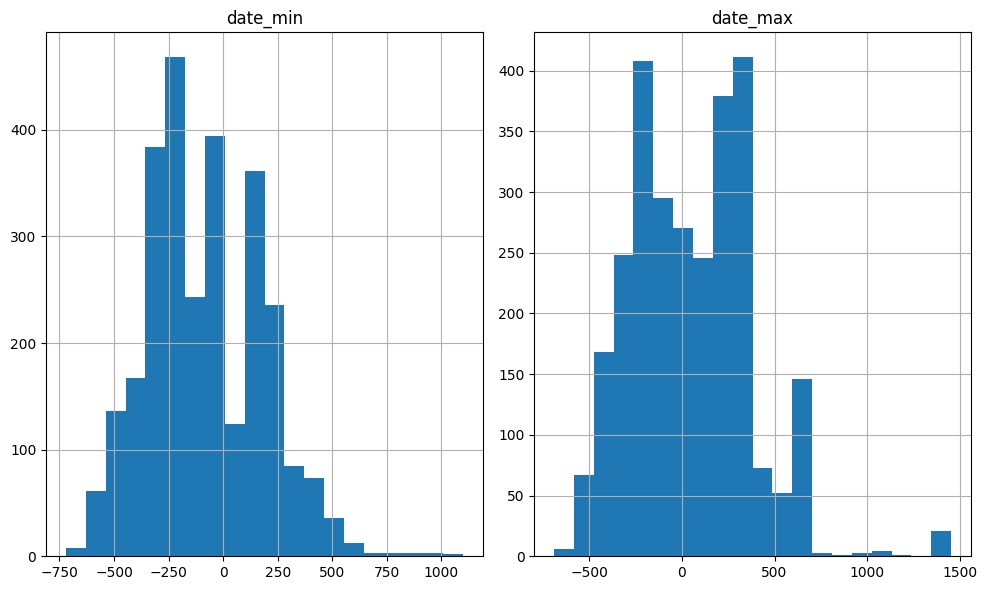

In [73]:
import matplotlib.pyplot as plt

#df[['Text_IDF', 'date_min', 'date_max']].hist(figsize=(10, 6), bins=20)
df[['text_num', 'date_min', 'date_max']].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()

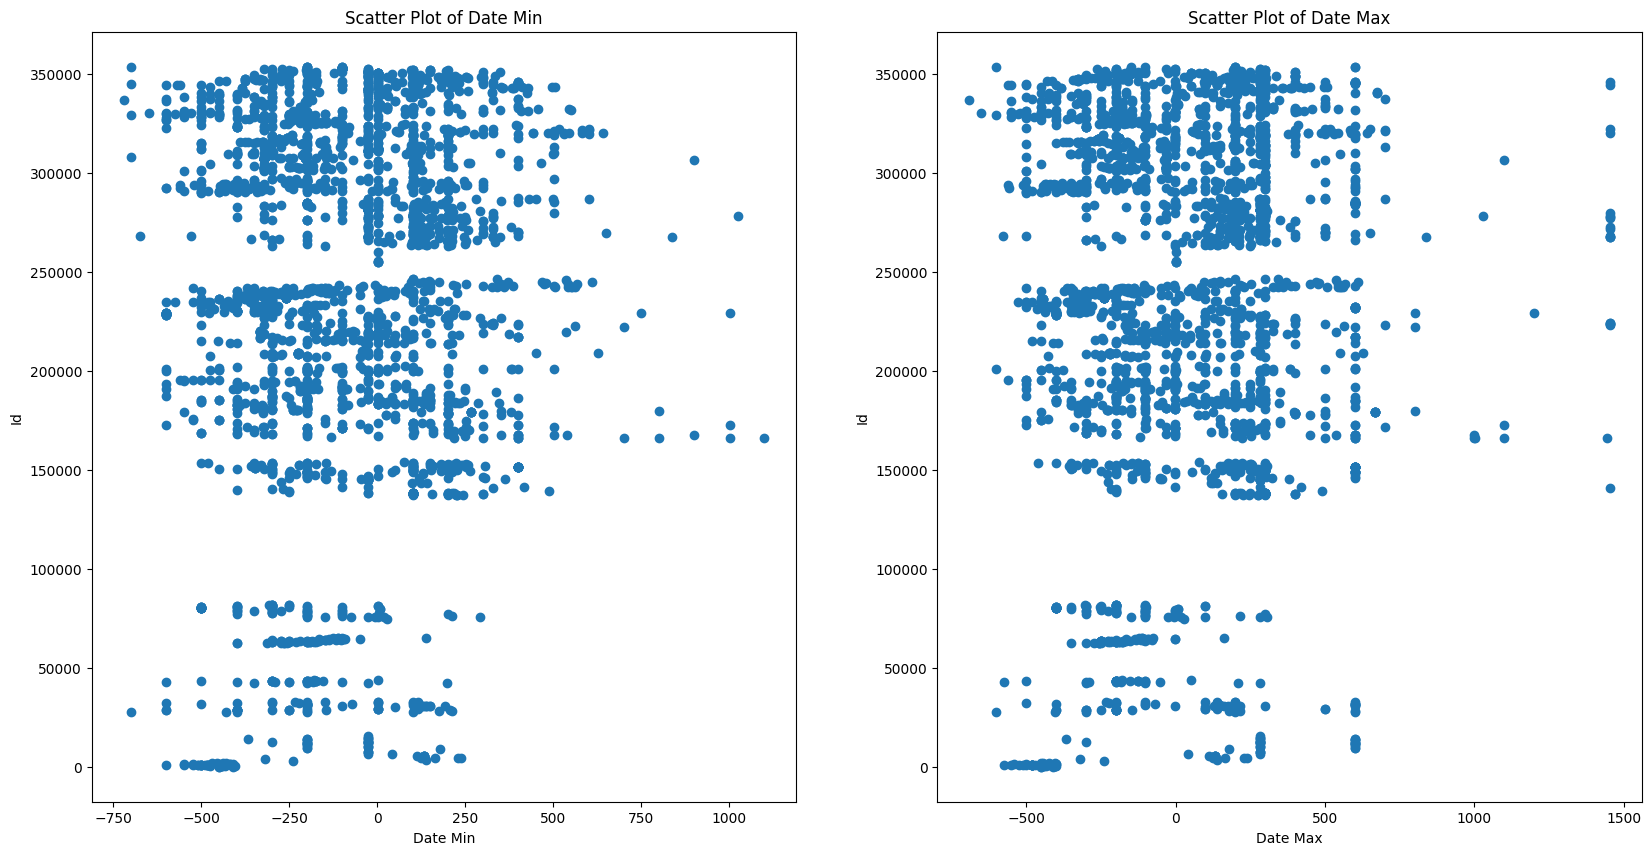

In [74]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
x_values = df['date_min']
y_values = df['id']
x_values_2 = df['date_max']
y_values_2 = df['id']

fig, axes = plt.subplots(1, 2, figsize=(20, 10))


axes[0].scatter(x_values, y_values)
axes[0].set_xlabel('Date Min')
axes[0].set_ylabel('Id')
axes[0].set_title('Scatter Plot of Date Min')

axes[1].scatter(x_values_2, y_values_2)
axes[1].set_xlabel('Date Max')
axes[1].set_ylabel('Id')
axes[1].set_title('Scatter Plot of Date Max')


# plt.tight_layout()
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


X_text_idf = X_tfidf
scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(df[['region_main_id', 'region_sub_id', 'date_min', 'date_max']])
norm_dataset = pd.concat([df['text_num'], pd.DataFrame(X_numeric, columns=['region_main_id', 'region_sub_id', 'date_min', 'date_max'])], axis=1)


#### γ) Διασταυρούμενη Επικύρωση (cross-validation)

In [76]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

X = norm_dataset.values
zeros_array = np.zeros(len(df))
y = zeros_array
kfold = StratifiedKFold(n_splits=5, shuffle=True)

for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]


### Α2. Επιλογή αρχιτεκτονικής

#### α) Η εκπαίδευση και αξιολόγηση των μοντέλων με τη χρήση της Ρίζας του Μέσου Τετραγωνικού Σφάλματος (RMSE)


In [77]:
from keras import backend as K
import tensorflow as tf

@tf.function
def crmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


#### β) Συνάρτηση ενεργοποίησης για τους κρυφούς κόμβους

In [78]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense


rmseList = []

X = X.astype('float64') # Για αναπάντεχα λάθη
y = y.astype('float64')

for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model = Sequential()
    model.add(Dense(10, activation="relu", input_dim=5))
    model.compile(optimizer='sgd', loss=crmse, metrics=['mae',crmse])
    model.fit(X_train, y_train)
    scores = model.evaluate(X_val, y_val, verbose=0)
    rmseList.append(scores[0])
    print("Fold :", fold, " RMSE:", scores[0])

print("RMSE: ", np.mean(rmseList))


71/71 [==============================] - 1s 3ms/step - loss: 0.6384 - mae: 0.3083 - crmse: 0.6339
Fold : 0  RMSE: 0.41205933690071106
71/71 [==============================] - 1s 2ms/step - loss: 0.1356 - mae: 0.0531 - crmse: 0.1340
Fold : 1  RMSE: 0.10643324255943298
71/71 [==============================] - 1s 2ms/step - loss: 0.5284 - mae: 0.2860 - crmse: 0.5258
Fold : 2  RMSE: 0.3126786947250366
71/71 [==============================] - 0s 2ms/step - loss: 0.4424 - mae: 0.2615 - crmse: 0.4435
Fold : 3  RMSE: 0.2687537670135498
71/71 [==============================] - 0s 2ms/step - loss: 0.8517 - mae: 0.5391 - crmse: 0.8465
Fold : 4  RMSE: 0.568882167339325
RMSE:  0.3337614417076111


#### γ) Συνάρτηση ενεργοποίησης για τους κόμβους εξόδου

In [105]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense


rmseList = []

X = X.astype('float64') # Για αναπάντεχα λάθη
y = y.astype('float64')

for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model = Sequential()
    model.add(Dense(10, activation="relu", input_dim=5))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='sgd', loss=crmse, metrics=['mae',crmse])
    model.fit(X_train, y_train)

    # Evaluate model
    scores = model.evaluate(X_val, y_val, verbose=0)
    rmseList.append(scores[0])
    print("Fold :", fold, " RMSE:", scores[0])

print("RMSE: ", np.mean(rmseList))

71/71 [==============================] - 1s 2ms/step - loss: 0.1877 - mae: 0.1567 - crmse: 0.1858
Fold : 0  RMSE: 0.07556580007076263
71/71 [==============================] - 1s 3ms/step - loss: 0.1934 - mae: 0.1508 - crmse: 0.1918
Fold : 1  RMSE: 0.14776331186294556
71/71 [==============================] - 1s 3ms/step - loss: 0.2497 - mae: 0.1736 - crmse: 0.2475
Fold : 2  RMSE: 0.0705992728471756
71/71 [==============================] - 1s 2ms/step - loss: 0.0965 - mae: 0.0687 - crmse: 0.0954
Fold : 3  RMSE: 0.0647396519780159
71/71 [==============================] - 1s 2ms/step - loss: 0.1411 - mae: 0.1077 - crmse: 0.1399
Fold : 4  RMSE: 0.07790437340736389
RMSE:  0.08731448203325272


#### δ) Πειραματισμός με 3 διαφορετικές τιμές για τον αριθμό των νευρώνων του κρυφού επιπέδου

71/71 [==============================] - 1s 2ms/step - loss: 0.1259 - mae: 0.1056 - crmse: 0.1252
H = 5, RMSE 0:  0.13857608735561372
H = 10, RMSE 1:  0.10539658963680268
H = 20, RMSE 2:  0.08005149960517884


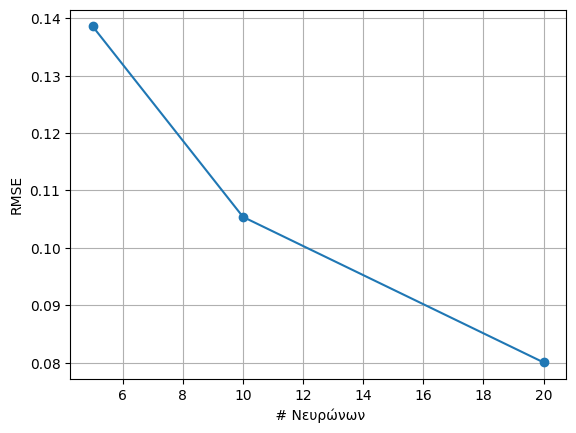

In [116]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

nodes = [5, 10, 20]
node_results = []

X = X.astype('float64')
y = y.astype('float64')
for node_ind, node_num in enumerate(nodes):
    rmseList = []
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model = Sequential()
        model.add(Dense(node_num, activation="relu", input_dim=5))
        model.add(Dense(1, activation="linear"))
        model.compile(optimizer='sgd', loss=crmse, metrics=['mae',crmse])
        model.fit(X_train, y_train)

        scores = model.evaluate(X_val, y_val, verbose=0)
        rmseList.append(scores[0])
    node_results.append(np.mean(rmseList))

for i in range(len(node_results)):
    print(f"H = {nodes[i]}, RMSE {i}: ", node_results[i])

plt.plot(nodes, node_results, marker='o')
plt.xlabel(' # Νευρώνων')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


#### ε) Προσθήκη ενός έως δύο ακόμα κρυφών επιπέδων στο δίκτυο (Η2, Η3). Πειραματισμός με τον αριθμό των κόμβων

# of layers: 1, 0.010481019209449492RMSE MO
# of layers: 2, 0.008437181207894658RMSE MO
# of layers: 3, 0.0019297956935285278RMSE MO


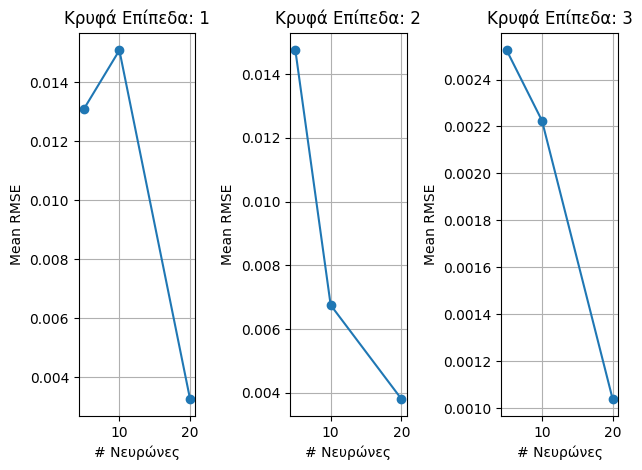

In [118]:
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

nodes = [5, 10, 20]
layers = [1, 2, 3]
layer_results = []

for layer in layers:
    node_results = []
    for node_num in nodes:
        rmseList = []
        for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model = Sequential()
            for i in range(layer):
                model.add(Dense(node_num, activation="relu", input_dim=5))
            model.add(Dense(1, activation="linear"))
            model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
            model.fit(X_train, y_train, verbose=0)
            scores = model.evaluate(X_val, y_val, verbose=0)
            rmseList.append(scores[0])
        node_results.append(np.mean(rmseList))
    layer_results.append(node_results)

for i, layer in enumerate(layers):
    plt.subplot(1, 3, i+1)
    plt.plot(nodes, layer_results[i], marker='o')
    print(f'# of layers: {layer}, {np.mean(layer_results[i])}RMSE MO')
    plt.xlabel('# Nευρώνες')
    plt.ylabel('Mean RMSE')
    plt.title(f'Κρυφά Επίπεδα: {layer}')
    plt.grid(True)

plt.tight_layout()
plt.show()


#### στ) Κριτήριο τερματισμού

71/71 [==============================] - 1s 6ms/step - loss: 0.0104 - mae: 0.0779 - val_loss: 0.0054 - val_mae: 0.0637


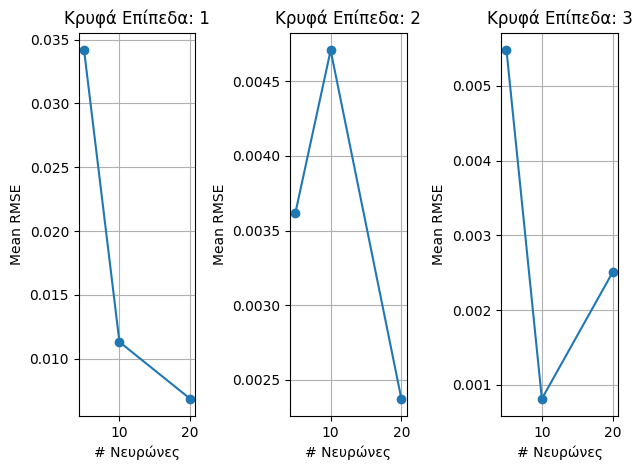

In [119]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

nodes = [5, 10, 20]
layers = [1, 2, 3]
layer_results = []

for layer in layers:
    node_results = []
    for node_num in nodes:
        rmseList = []
        for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model = Sequential()
            for i in range(layer):
                model.add(Dense(node_num, activation="relu", input_dim=5))
            model.add(Dense(1, activation="linear"))
            model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
            #model.fit(X_train, y_train, verbose=0)
            history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[early_stopping])
            scores = model.evaluate(X_val, y_val, verbose=0)
            rmseList.append(scores[0])
        node_results.append(np.mean(rmseList))
    layer_results.append(node_results)

for i, layer in enumerate(layers):
    plt.subplot(1, 3, i+1)
    plt.plot(nodes, layer_results[i], marker='o')
    plt.xlabel('# Nευρώνες')
    plt.ylabel('Mean RMSE')
    plt.title(f'Κρυφά Επίπεδα: {layer}')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Α3. Μεταβολές στον ρυθμό εκπαίδευσης και σταθεράς ορμής

LR: 0.001, Momentum: 0.2: 0.018958357255905868 RMSE MO
LR: 0.001, Momentum: 0.6: 0.004981526685878634 RMSE MO
LR: 0.05, Momentum: 0.6: 0.0002839398803189397 RMSE MO
LR: 0.1, Momentum: 0.6: 0.00017752798448782413 RMSE MO
Best Learning Rate: 0.05
Best Momentum: 0.6


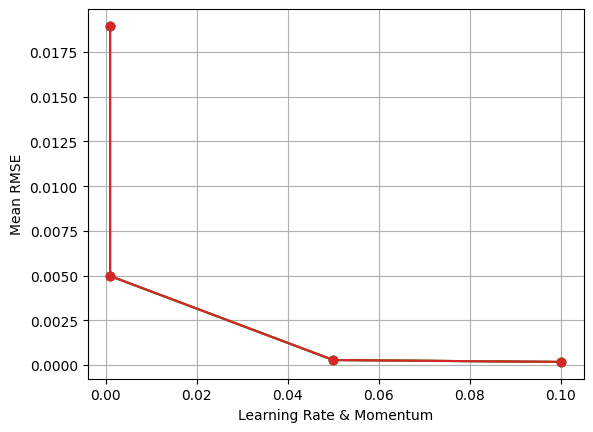

In [110]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

nodes = [5, 10, 20]
layers = [1, 2, 3]
learning_rates = [0.001, 0.001, 0.05, 0.1]
momentum_values = [0.2, 0.6, 0.6, 0.6]
pair_results = []

best_rmse = float('inf')
best_lr = None
best_momentum = None

for common_index, lr in enumerate(learning_rates):
    momentum = momentum_values[common_index]
    for layer in layers:
        for node_num in nodes:
            rmseList = []
            for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
                early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                                               restore_best_weights=True)
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]
                model = Sequential()
                for i in range(layer):
                    model.add(Dense(node_num, activation="relu", input_dim=5))
                model.add(Dense(1, activation="linear"))
                optimizer = SGD(learning_rate=lr, momentum=momentum)
                model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
                history = model.fit(X_train, y_train,
                                    validation_data=(X_val, y_val),
                                    callbacks=[early_stopping], verbose=0)
                scores = model.evaluate(X_val, y_val, verbose=0)
                rmseList.append(scores[0])
                mean_rmse = np.mean(rmseList)

            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_lr = lr
                best_momentum = momentum
    print(f'LR: {lr}, Momentum: {momentum}: {mean_rmse} RMSE MO')
    pair_results.append(mean_rmse)

print("Best Learning Rate:", best_lr)
print("Best Momentum:", best_momentum)

for i, lr in enumerate(learning_rates):
    plt.plot(learning_rates, pair_results, marker='o',
             label=f'Learning Rate = {lr}, Momentum = { momentum_values[i]}')
plt.xlabel('Learning Rate & Momentum')
plt.ylabel('Mean RMSE')
plt.grid(True)
plt.show()



### Α4. Ομαλοποίηση

Rin: 0.8, Rh: 0.5: 0.004855748312547803 RMSE MO
Rin: 0.5, Rh: 0.5: 0.014212544076144695 RMSE MO
Rin: 0.8, Rh: 0.2: 0.014981142152100802 RMSE MO


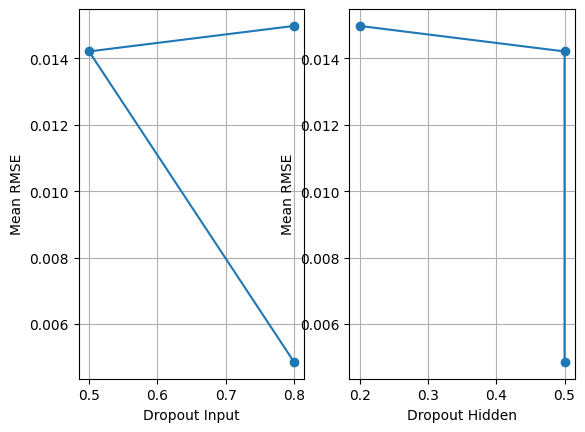

In [123]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

nodes = [5, 10, 20]
dropout_in = [0.8, 0.5, 0.8]
dropout_hid = [0.5, 0.5, 0.2]
drop_results = []

for common_ind, dropout_rate_in in enumerate(dropout_in):
    dropout_rate_hid = dropout_hid[common_ind]
    for node_num in nodes:
        rmseList = []
        for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model = Sequential()
            model.add(Dropout(rate=dropout_rate_in, input_shape=(5,)))
            model.add(Dense(node_num, activation="relu"))
            model.add(Dropout(rate=dropout_rate_hid))
            model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
            history = model.fit(X_train, y_train,
                                validation_data=(X_val, y_val), verbose=0)
            scores = model.evaluate(X_val, y_val, verbose=0)
            rmseList.append(scores[0])
            rmse_mean = np.mean(rmseList)
    drop_results.append(rmse_mean)
    print(f'Rin: {dropout_rate_in}, Rh: {dropout_rate_hid}: {rmse_mean} RMSE MO')

plt.subplot(1,2,1)
plt.plot(dropout_in, drop_results, marker='o', label=f'Dropout Input')
plt.xlabel('Dropout Input')
plt.ylabel('Mean RMSE')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(dropout_hid, drop_results, marker='o', label=f'Dropout Hid')
plt.xlabel('Dropout Hidden')
plt.ylabel('Mean RMSE')
plt.grid(True)


plt.show()


### A5. Γλωσσικά Μοντέλα (bonus)

In [85]:
from transformers import AutoTokenizer, AutoModel
tokeniser = AutoTokenizer.from_pretrained("pranaydeeps/Ancient-Greek-BERT")
model = AutoModel.from_pretrained("pranaydeeps/Ancient-Greek-BERT")



